This simple ipython notebook will get you started using pymola. Note that pymola is still under heavy development, so if you find a bug, please let me know or contribute a fix.

## Modelica Model Description

In [1]:
import pymola.gen_sympy
import pylab as pl
import sympy
%load_ext autoreload
%autoreload 2
%matplotlib inline

Here is a simple example modelica model.

In [17]:
%%file Test.mo
model Test
    parameter Real c=10;
    Real x(start=0), v_x(start=0);
    Real y(start=0), v_y(start=0);
equation
    der(x) = v_x;
    der(y) = v_y;
    der(v_x) = -c*x^2;
    der(v_y) = -c*y^2;
end Test;

Overwriting Test.mo


## Compiling a Python Simulation from Modelica

To generate a python simulation, we supply a modelica file and the name of the genereated python module.

In [18]:
pymola.gen_sympy.main(['Test.mo', 'pymola_test.py'])

dict {'dynamic_symbols': OrderedDict([(u'x', {'start': u'0'}), (u'v_x', {'start': u'0'}), (u'y', {'start': u'0'}), (u'v_y', {'start': u'0'})]), 'parameters': OrderedDict([(u'c', u'10')])}


RuntimeError: no value set for expr:
input:
x^2

##  Generated Python Module

The generated module includes a model class.

In [4]:
import pymola_test

In [5]:
test = pymola_test.Model()

x: Matrix([[x(t)], [v_x(t)], [y(t)], [v_y(t)]])
f: Matrix([[v_x(t)], [-c*x(t)], [v_y(t)], [-c*y(t)]])
p: [c]


You can see the attributes of the class instance below.

In [6]:
test.x0_dict

OrderedDict([('y', 0), ('x', 0), ('v_x', 0), ('v_y', 0)])

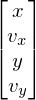

In [7]:
test.x

## Simulation

Simulation is simple, and works well with matplotlib.

In [8]:
test.x0_dict['x'] = 1
test.x0_dict['v_x'] = 1
test.x0_dict['y'] = 2
test.x0_dict['v_y'] = 2
test.x0_dict

OrderedDict([('y', 2), ('x', 1), ('v_x', 1), ('v_y', 2)])

In [9]:
test.f_lam(1,[1,2,3,4], [0])

matrix([[2],
        [0],
        [4],
        [0]])

p0 [10]
x0 [1, 2, 1, 2]


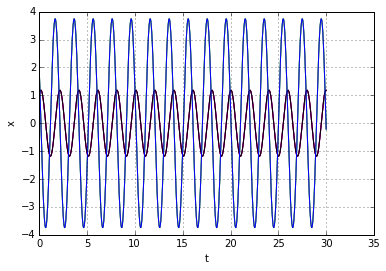

In [10]:
data = test.simulate();
pl.plot(data['t'], data['x'])
pl.xlabel('t')
pl.ylabel('x')
pl.grid()

## Analytical Jacobians with Sympy

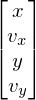

In [11]:
test.x

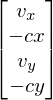

In [12]:
test.f

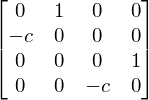

In [13]:
A = test.f.jacobian(test.x)
A

## Generated Python Source Code

For the interested reader, the generated python source code for the model is shown below.

In [14]:
%cat pymola_test.py


#############################################################################
# Automatically generated by pymola

from __future__ import print_function, division
import sympy
import sympy.physics.mechanics as mech
sympy.init_printing()
mech.init_vprinting()
import scipy.integrate
import pylab as pl
from collections import OrderedDict

#pylint: disable=too-few-public-methods, too-many-locals, invalid-name, no-member

class Model(object):
    """
    Modelica Model.
    """

    def __init__(self):
        """
        Constructor.
        """

        self.t = sympy.symbols('t')

        
        # symbols
        c = \
            sympy.symbols('c')
        

        # dynamic symbols
        x, v_x, y, v_y = \
            mech.dynamicsymbols('x, v_x, y, v_y')

        # parameters
        self.p_dict = OrderedDict({
            'c': 10,
        })

        # initial sate
        self.x0_dict = OrderedDict({
            'x': 0,
            'v_x': 0,
            'y': 0,
            'v_